In [1]:
import numpy as np 

In [2]:
import matplotlib.pyplot as plt 

(499, 489, 3)
(256, 256, 3)


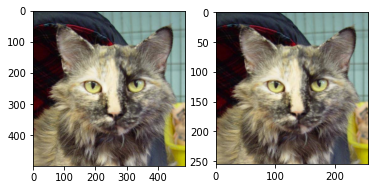

In [3]:
import cv2
image_1 = cv2.imread('/content/drive/MyDrive/dataset/training_set/cats/cat.10.jpg')
# original image

plt.subplot(1,2,1)
plt.imshow(image_1[:,:,::-1])


print(image_1.shape)

# resizing the image 

image_resize = cv2.resize(image_1 , ((256,256)))

print(image_resize.shape)
plt.subplot(1,2,2)
plt.imshow(image_resize[:,:,::-1])

In [4]:
# setting same size of an image 

img_height, img_width = [256,256]


In [5]:
# finding the data:

path = '/content/drive/MyDrive/dataset'

In [6]:
# finding training data path and test data path 

train_data_path = '/content/drive/MyDrive/dataset/training_set'
test_data_path = '/content/drive/MyDrive/dataset/test_set'

In [7]:
import tensorflow
print(tensorflow.__version__)

2.9.2


In [8]:
from tensorflow import keras 
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [9]:
# Data_preprocessing on the image using tensorflow image data generator module 


# follow = https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator


training_prepross = ImageDataGenerator(rescale = 1./255,
                                       shear_range = 0.2,
                                       zoom_range = 0.2,
                                       horizontal_flip = True,
                                       vertical_flip = True)

# training is done with rescale pixel so testing should be also same:

# irrepective of that nothinh should be added for test:

testing_process = ImageDataGenerator(rescale = 1./255)



In [10]:
# Finding the label folders:
# using glob we can find the number of label folders in trainin_dataset_folder:

import glob 
from glob import glob

glob('/content/drive/MyDrive/dataset/training_set/*')


['/content/drive/MyDrive/dataset/training_set/dogs',
 '/content/drive/MyDrive/dataset/training_set/cats']

In [11]:
# for test finding the label in testdata set folder:

glob('/content/drive/MyDrive/dataset/test_set/*')

['/content/drive/MyDrive/dataset/test_set/cats',
 '/content/drive/MyDrive/dataset/test_set/dogs']

In [12]:
target = ['cats','dogs']

In [13]:
## collecting each image from training labels folder and test labels folder:

train_data = training_prepross.flow_from_directory(train_data_path , 
                                                   target_size = (img_height,img_width),
                                                   classes = target , 
                                                   class_mode = 'binary',
                                                   batch_size = 32)



test_data = testing_process.flow_from_directory(test_data_path , 
                                                   target_size = (img_height,img_width),
                                                   classes = target , 
                                                   class_mode = 'binary',
                                                   batch_size = 32)


Found 8005 images belonging to 2 classes.
Found 2023 images belonging to 2 classes.


In [14]:
# Now its time for Building an CNN Model architecture:

# Importing required Packages:

from tensorflow.keras.models import Sequential # beginnnig  of CNN 
from tensorflow.keras.layers import Conv2D , MaxPool2D ,Flatten,Activation , Dense
from tensorflow.keras.activations import relu,sigmoid,softmax
from tensorflow.keras.optimizers import Adam


In [15]:
# Build CNN Architecture:

model = Sequential()

# First hidden layer in CNN
model.add(Conv2D(128 , kernel_size = (3,3),padding='same',activation='relu',input_shape = (img_height,img_width,3)))
model.add(MaxPool2D(pool_size = (2,2)))

# second hidden layer in CNN 
model.add(Conv2D(64 , kernel_size = (3,3),padding='same',activation='relu'))
model.add(MaxPool2D(pool_size = (2,2)))


# Third hidden layer in CNN 
model.add(Conv2D(32 , kernel_size = (3,3),padding='same',activation='relu'))
model.add(MaxPool2D(pool_size = (2,2)))


# Fourth hidden layer in CNN 
model.add(Conv2D(16 , kernel_size = (3,3),padding='same',activation='relu'))
model.add(MaxPool2D(pool_size = (2,2)))


# Fifth hidden layer in CNN 
model.add(Conv2D(8 , kernel_size = (3,3),padding='same',activation='relu'))
model.add(MaxPool2D(pool_size = (2,2)))


# Sixth hidden layer in CNN 
model.add(Conv2D(4 , kernel_size = (3,3),padding='same',activation='relu'))
model.add(MaxPool2D(pool_size = (2,2)))

model.add(Flatten())  # converting into 1-d and giving 1-d to ANN 

model.add(Dense(32 , activation = 'relu')) # first hidden layer in ANN
model.add(Dense(16 , activation = 'relu'))  # second hidden layer in ANN
model.add(Dense(8 , activation = 'relu'))  # Third Hidden layer in ANN 

model.add(Dense(1 , activation = 'sigmoid')) # since its is a binary classfication using sigmoid as an output actiavtion function:



In [16]:
model.summary() # see the architecture:


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 256, 256, 128)     3584      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 128, 128, 128)    0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 64)      73792     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 64, 64, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 64, 64, 32)        18464     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 32, 32, 32)       0

In [17]:
model.compile(optimizer='adam' , loss = 'binary_crossentropy' , metrics = ['Accuracy'])



In [18]:
model.fit(train_data , epochs = 2)

Epoch 1/2
251/251 [==============================] - 1949s 8s/step - loss: 0.6933 - Accuracy: 0.4947
Epoch 2/2
251/251 [==============================] - 158s 627ms/step - loss: 0.6926 - Accuracy: 0.5204


In [20]:
model.history.history.keys()

dict_keys(['loss', 'Accuracy'])

In [21]:
model.history.history['loss']

[0.6932947039604187, 0.6926009654998779]

In [22]:
model.history.history['Accuracy']

[0.49469080567359924, 0.5204247236251831]

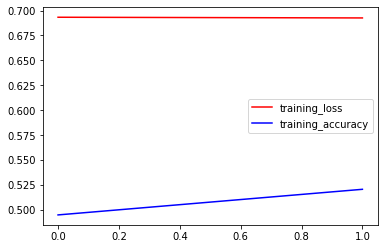

In [23]:
plt.plot(np.arange(2) , model.history.history['loss'] , color = 'r' , label = 'training_loss')
plt.plot(np.arange(2) , model.history.history['Accuracy'] , color = 'b' , label = 'training_accuracy')
plt.legend(loc = 0)
plt.show()


In [24]:
test_data.classes

array([0, 0, 0, ..., 1, 1, 1], dtype=int32)

In [25]:
test_data.classes[1000:1500]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [27]:
test_report = model.predict(test_data)
test_report

64/64 [==============================] - 891s 14s/step


array([[0.50333035],
       [0.495711  ],
       [0.49860474],
       ...,
       [0.5046314 ],
       [0.48761922],
       [0.49992287]], dtype=float32)

In [28]:
c = []
for i in test_report:
  if i > 0.5:
    c.append(1)
  else:
    c.append(0)

In [30]:
c[:5]

[1, 0, 0, 1, 0]

In [31]:
from sklearn.metrics import accuracy_score , confusion_matrix , classification_report

In [32]:
accuracy_score(test_data.classes , c)

0.4819574888779041

In [33]:
confusion_matrix(test_data.classes , c)

array([[454, 557],
       [491, 521]])

In [34]:
print(classification_report(test_data.classes , c))

              precision    recall  f1-score   support

           0       0.48      0.45      0.46      1011
           1       0.48      0.51      0.50      1012

    accuracy                           0.48      2023
   macro avg       0.48      0.48      0.48      2023
weighted avg       0.48      0.48      0.48      2023



**checking with own data**



`collect an image from internet and making predictions:`

In [37]:
import cv2

In [50]:
def testing_images(path):
  img = cv2.imread(path)
  # print(img) pixel values in an image:
  img = cv2.resize(img , (img_height , img_width))
  # resize an image because it was trained on 256 * 256
 # print(img.shape)
  img = np.array(img) / 255.0
  # scaling down the values between 0-1: because training done with rescale:
  img = np.expand_dims(img , axis = 0)
 # print(img.shape) making it as 1 image data:
  result = model.predict(img)
  print(result)  # predicted value by sigmoid activation function:
  if result > 0.5:
    print('dog')
  else:
    print('cat')  
  image = plt.imread(path)
  plt.imshow(image)

1/1 [==============================] - 0s 52ms/step
[[0.50768226]]
dog


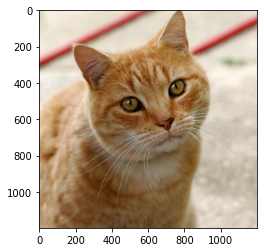

In [51]:
testing_images('/content/Cat03.jpg')

1/1 [==============================] - 0s 23ms/step
[[0.5111718]]
dog


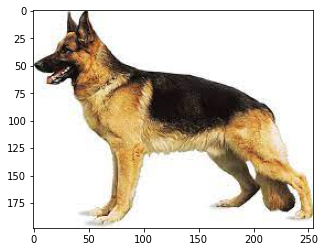

In [52]:
testing_images('/content/download (4).jpg')

1/1 [==============================] - 0s 18ms/step
[[0.51180184]]
dog


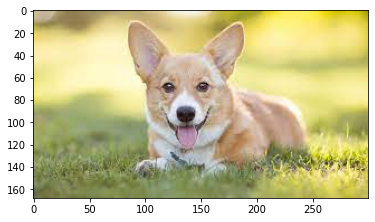

In [53]:
testing_images('/content/download (5).jpg')

1/1 [==============================] - 0s 24ms/step
[[0.50853765]]
dog


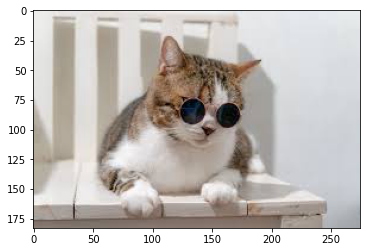

In [54]:
testing_images('/content/images.jpg')